1. 제공되고 있는 데이터에 대한 기본 구조 및 현황 파악
2. 데이터에 대한 각 속성별 특징 및 파악되고 있는 데이터 성격 내용 정리
3. 해당 데이터를 바탕으로 진행 할 수 있는 분석 과제에 대한 리스트 업


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from collections import Counter
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

df=pd.read_csv('E:/comento/train_mdf.csv')
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


# 데이터 탐색

In [31]:
# 데이터 컬럼명 확인
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [33]:
df.shape

(1460, 81)

In [34]:
# Numerical feature , Categorical feature 로 구분
numerical_feats = df.dtypes[df.dtypes != 'object'].index
cateogorical_feats = df.dtypes[df.dtypes == 'object'].index

print(df[numerical_feats].columns)
print("="*80)
print(df[cateogorical_feats].columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', '

- 수치형 변수 : 38개, 범주형 변수 : 43개

- Type : 데이터 유형에 대한 식별자. 'numerical', 'categorical' 두가지가 가능하다.  'numerical' 은 변수가 숫자 형태라는 의미이고, 'categorical'은 카테고리 형태의 값라는 뜻이다.

- Segment :  데이터 세그먼트에 대한 식별자. 'building', 'space', 'location' 세가지 값이 있다. 'building'은 건물의 물리적 특성과 관련된 변수(예: 'OverallQuality')를 의미한다. 'space'는 집의 공간 특성을 뜻하는 변수(예: 'TotalBSMTSF')를 의미한다. 마지막으로, 'location'은 집이 있는 장소(예: '이웃집')에 대한 정보를 주는 변수를 의미한다.

In [35]:
df[numerical_feats].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


- LotArea: Lot size in square feet
- OverallQual: Rates the overall material and finish of the house > 1~10 범주형
- OverallCond: Rates the overall condition of the house > 1~10 범주형
- YearBuilt: Original construction date
- TotalBsmtSF: Total square feet of basement area
- GrLivArea: Above grade (ground) living area square feet
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- GarageArea: Size of garage in square feet
- SalePrice

- 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
  'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
  'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
  'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
  'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  'MiscVal', 'MoSold',YrSold' > 제거

1. 집을 살 때 이 변수를 생각하는가? (예: 우리가 꿈의 집을 생각할 때, 우리는 'Masonry veneer type'을 신경 쓰는가?)

2. 그렇다면 이 변수는 얼마나 중요할까?(예: 'Poor' 대신 'Excellent' 소재를 외관에 적용하면 어떤 영향이 있을까?)

3. 이 정보가 다른 변수에 이미 설명되어 있는가? (예: 'LandContourer'가 재산의 평탄성을 제공한다면, 'LandSlope'를 꼭 알아야 하는가?)

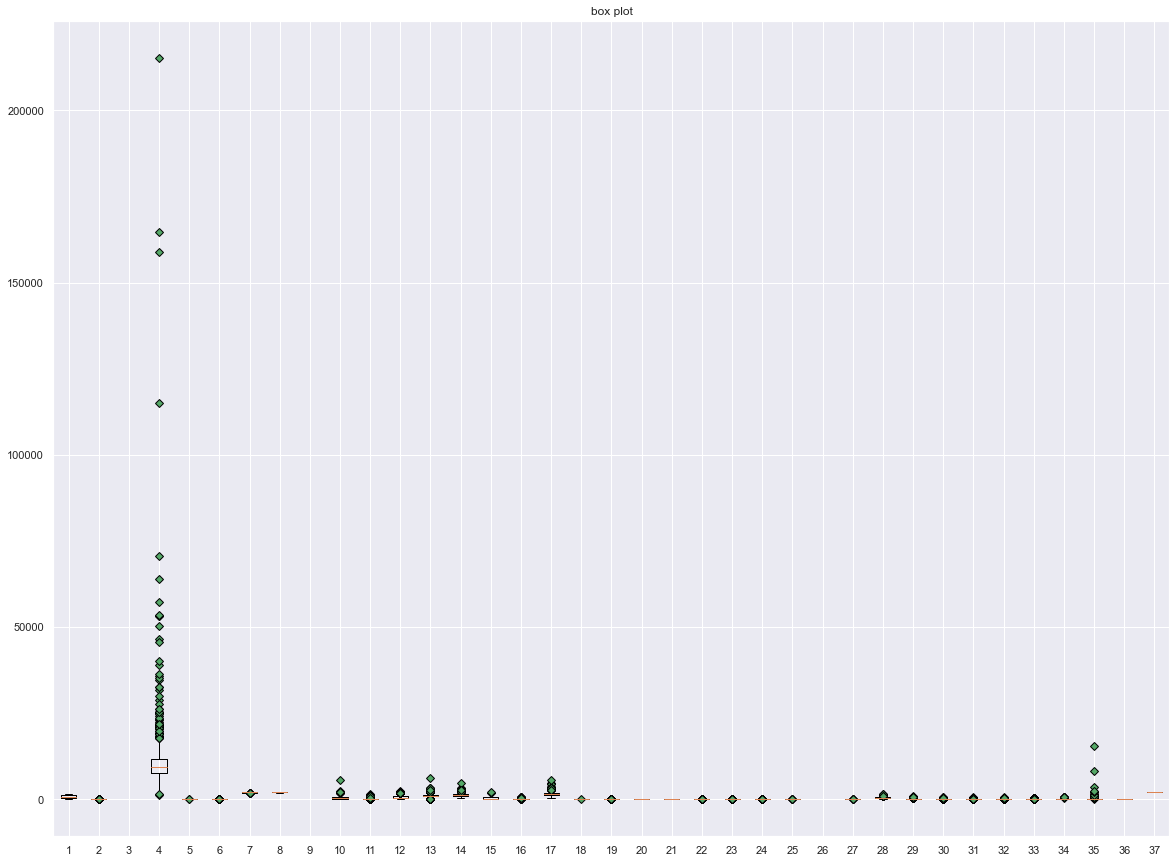

In [36]:
boxplotcon = dict(markerfacecolor='g', marker='D')
plt.figure(figsize= (20,15))
plt.boxplot(df[numerical_feats[:-1]], flierprops=boxplotcon)
plt.title("box plot")
plt.show()


In [37]:
# 이상치 찾기

def detect_outliers(df, n, features): 
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25) 
        Q3 = np.percentile(df[col], 75) 
        IQR = Q3 - Q1 
        
        outlier_step = 1.5 * IQR 
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index 
        
        outlier_indices.extend(outlier_list_col) 
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n) 
        
    return multiple_outliers 

In [38]:
Outliers_to_drop = detect_outliers(df, 2
                                   , ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual'
                                      , 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea'
                                      , 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'
                                      , '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea'
                                      , 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'
                                      , 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces'
                                      , 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF'
                                      , 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'
                                      , 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'])


In [39]:
# 이상치가 발견된 행

df.loc[Outliers_to_drop]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
93,94,190,C (all),60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,133900
125,126,190,RM,60.0,6780,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,84500
165,166,190,RL,62.0,10106,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,127500
172,173,160,RL,44.0,5306,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,239000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,1351,90,RL,91.0,11643,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,200000
634,635,90,RL,64.0,6979,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,600,6,2010,WD,Normal,144000
910,911,90,RL,80.0,11600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,154300
1292,1293,70,RM,60.0,6600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2009,WD,Normal,107500


In [40]:
# 이상치 삭제

df_num_drop = df.drop(Outliers_to_drop, axis = 0).reset_index(drop=True) 
df_num_drop.shape


(1338, 81)

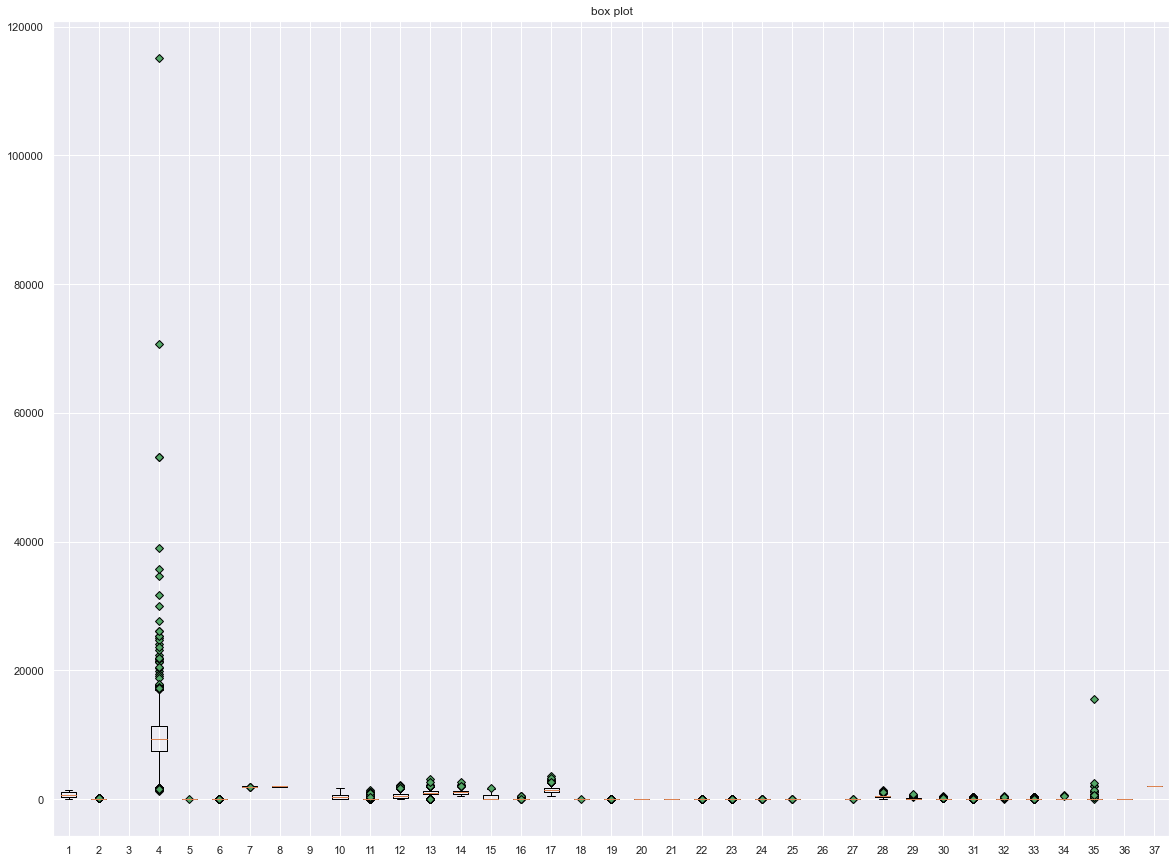

In [41]:
green_diamond = dict(markerfacecolor='g', marker='D')
plt.figure(figsize= (20,15))
plt.boxplot(df_num_drop[numerical_feats[:-1]], flierprops=boxplotcon)
plt.title("box plot")
plt.show()


In [42]:
# 결측치 확인
"""
feature별 결측치가 몇 % 인지 확인.
df_num_drop[col].isnull().sum() : 해당 열의 결측치가 몇개인지 (TRUE=1(결측치), FALSE=0으로 계산)
df_num_drop[col].shape[0] : 해당 열의 차원
100 * (df_train[col].isnull().sum() / df_train[col].shape[0] : 위의 설명을 통해 %를 출력
"""

for col in df_num_drop.columns: 
    msperc = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_num_drop[col].isnull().sum() / df_num_drop[col].shape[0])) 
    
    print(msperc)


column:         Id	 Percent of NaN value: 0.00%
column: MSSubClass	 Percent of NaN value: 0.00%
column:   MSZoning	 Percent of NaN value: 0.00%
column: LotFrontage	 Percent of NaN value: 17.12%
column:    LotArea	 Percent of NaN value: 0.00%
column:     Street	 Percent of NaN value: 0.00%
column:      Alley	 Percent of NaN value: 94.10%
column:   LotShape	 Percent of NaN value: 0.00%
column: LandContour	 Percent of NaN value: 0.00%
column:  Utilities	 Percent of NaN value: 0.00%
column:  LotConfig	 Percent of NaN value: 0.00%
column:  LandSlope	 Percent of NaN value: 0.00%
column: Neighborhood	 Percent of NaN value: 0.00%
column: Condition1	 Percent of NaN value: 0.00%
column: Condition2	 Percent of NaN value: 0.00%
column:   BldgType	 Percent of NaN value: 0.00%
column: HouseStyle	 Percent of NaN value: 0.00%
column: OverallQual	 Percent of NaN value: 0.00%
column: OverallCond	 Percent of NaN value: 0.00%
column:  YearBuilt	 Percent of NaN value: 0.00%
column: YearRemodAdd	 Percent of

- column:      Alley	 Percent of NaN value: 94.10%
- column: FireplaceQu	 Percent of NaN value: 48.28%
- column:     PoolQC	 Percent of NaN value: 99.85%
- column:      Fence	 Percent of NaN value: 80.94%
- column: MiscFeature	 Percent of NaN value: 97.16%


<AxesSubplot:>

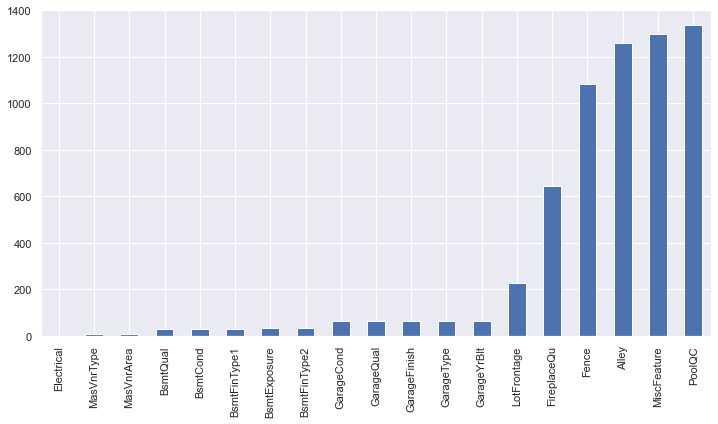

In [43]:
# barplot으로 확인

missing = df_num_drop.isnull().sum() 
missing = missing[missing > 0] 
missing.sort_values(inplace=True) 
missing.plot.bar(figsize = (12,6))


In [44]:
# 비대칭도(Skewness) , 첨도(Kurtosis)확인
"""
Skewness(비대칭도)란 분포가 얼마나 비대칭을 띄는가 알려주는 척도입니다.

(비대칭도: a=0이면 정규분포, a<0 이면 오른쪽으로 치우침, a>0이면 왼쪽으로 치우침)

Kurtosis (첨도)란 확률분포의 뾰족한 정도를 나타내는 척도입니다.

관측치들이 어느 정도 집중적으로 중심에 몰려 있는가를 측정할 때 사용됩니다.
"""

for col in numerical_feats: 
    print('{:15}'.format(col)
          , 'Skewness: {:05.2f}'.format(df_num_drop[col].skew()) 
          , ' ' 
          , 'Kurtosis: {:06.2f}'.format(df_num_drop[col].kurt()) )



Id              Skewness: 00.00   Kurtosis: -01.19
MSSubClass      Skewness: 01.37   Kurtosis: 001.49
LotFrontage     Skewness: 01.59   Kurtosis: 013.04
LotArea         Skewness: 07.78   Kurtosis: 123.55
OverallQual     Skewness: 00.16   Kurtosis: -00.05
OverallCond     Skewness: 00.74   Kurtosis: 001.23
YearBuilt       Skewness: -0.58   Kurtosis: -00.60
YearRemodAdd    Skewness: -0.52   Kurtosis: -01.27
MasVnrArea      Skewness: 02.69   Kurtosis: 011.04
BsmtFinSF1      Skewness: 00.65   Kurtosis: -00.50
BsmtFinSF2      Skewness: 04.86   Kurtosis: 026.86
BsmtUnfSF       Skewness: 00.87   Kurtosis: 000.29
TotalBsmtSF     Skewness: 00.29   Kurtosis: 001.17
1stFlrSF        Skewness: 00.66   Kurtosis: 000.02
2ndFlrSF        Skewness: 00.77   Kurtosis: -00.80
LowQualFinSF    Skewness: 12.74   Kurtosis: 170.50
GrLivArea       Skewness: 00.66   Kurtosis: 000.54
BsmtFullBath    Skewness: 00.56   Kurtosis: -00.96
BsmtHalfBath    Skewness: 04.91   Kurtosis: 024.68
FullBath        Skewness: -0.05

# EDA

### Numerical feature

<AxesSubplot:title={'center':'Correlation of Numeric Features with Sale Price'}>

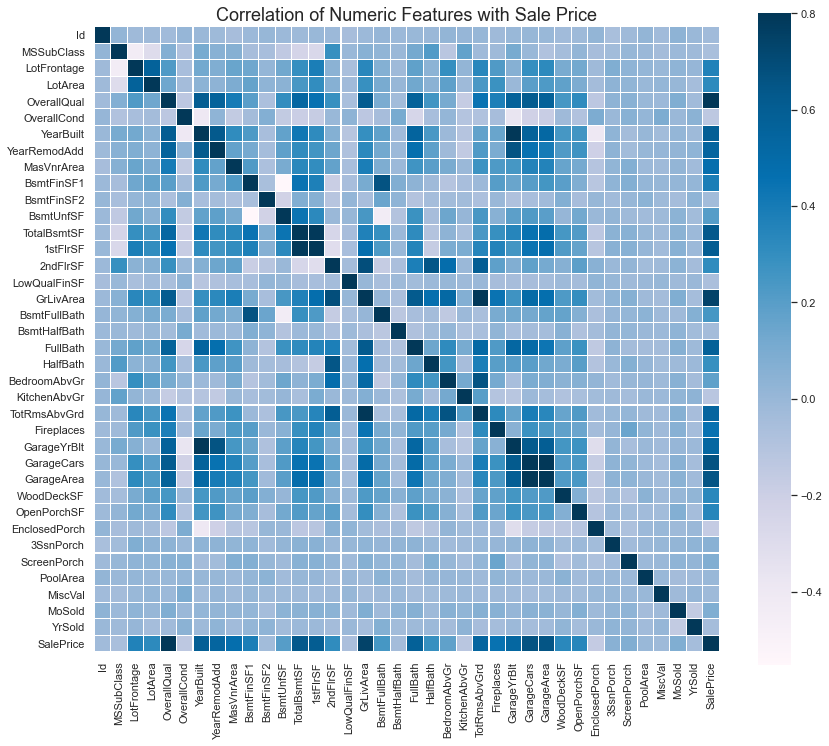

In [45]:
# heat map

corr_data = df_num_drop[['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond'
                      , 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2'
                      , 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF'
                      , 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'
                      , 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces'
                      , 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF'
                      , 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'
                      , 'MoSold', 'YrSold', 'SalePrice']]


colormap = plt.cm.PuBu 
sns.set(font_scale=1.0) 
f , ax = plt.subplots(figsize = (14,12)) 
plt.title('Correlation of Numeric Features with Sale Price',y=1,size=18) 
sns.heatmap(corr_data.corr(),square = True, linewidths = 0.1
            , cmap = colormap, linecolor = "white", vmax=0.8)



1. 'TotalBsmtSF'와 '1stFlrSF'변수의 관계입니다.

2. 'Garage'와 관련한 변수를 나타냅니다.

3. 'TotRmsAbvGrd'와 'GrLivArea'의 관계입니다.

-  'SalePrice'와의 상관 관계

- 'GrLivArea', 'TotalBsmtSF'및 'OverallQual'은 Target feature와 큰 연관성
> 'TotalBsmtSF'의 경우 선형관계의 기울기가 특히 높다는 것을 알 수 있다.
> 'OverallQual'의 boxplot을 보면 품질에 따라 가격이 어떻게 상승하는지 보여준다.

- 첫 번째는 'TotalBsmt'와 '1 stFlrSF'이다. 그리고 두 번째는 'GarageX' 변수들이다. 두 경우 모두 이러한 변수 사이의 상관관계가 크다는 것을 보여준다. 이 상관관계가 너무 강해서 다공성(multicollinearity) 상태를 나타낼 수 있다. 이 변수들에 대해 생각해보면, 이것들이 거의 동일한 정보를 제공하므로 실제로 다공성이 발생한다는 결론을 내릴 수 있다.

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'FullBath', 'TotRmsAbvGrd',
       'YearRemodAdd'],
      dtype='object')


<AxesSubplot:>

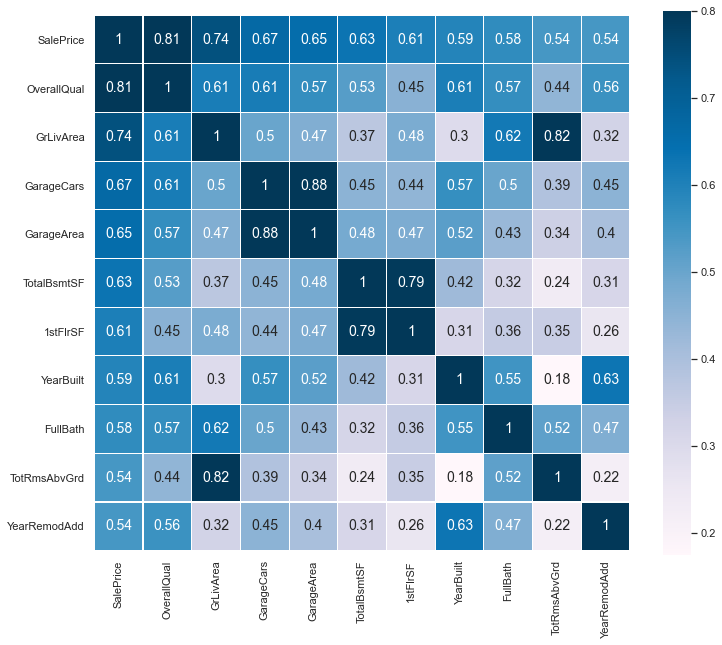

In [46]:
#zoomde heat map

k= 11 
cols = corr_data.corr().nlargest(k,'SalePrice')['SalePrice'].index 

print(cols) 

cm = np.corrcoef(df_num_drop[cols].values.T) 

f , ax = plt.subplots(figsize = (12,10)) 
sns.heatmap(cm, vmax=.8, linewidths=0.1,square=True,annot=True
            ,cmap=colormap, linecolor="white",xticklabels = cols.values 
            ,annot_kws = {'size':14},yticklabels = cols.values)



가장 눈에 띄는 GarageCars와 GarageArea, TotalBsmtSF와 1stFlrSF는 서로 밀접하게 연관되어 있음을 알 수 있습니다.

 

Target feature와 가장 밀접한 연관이 있는 feature는 'OverallQual', 'GrLivArea'및 'TotalBsmtSF'로 보입니다.

 

먼저 말했던 GarageCars와 GarageArea, TotalBsmtSF와 1stFlrSF, TotRmsAbvGrd와 GrLivArea는 모두 매우 유사한 정보를 포함하고 있으며 다중공선성이 나타난다고 할 수 있습니다.

 

SalePrice와 더 연관되어있는 변수인 GarageCars와 TotalBsmtSF, GrLivArea를 남기고 나머지는 이후에 버리는 것이 좋다고 판단.



Zoomed Heat Map에서 다중공선성을 보이는 변수 중 SalePrice와 연관이 덜 한 변수를 제외하고 PairPlot을 그립니다.


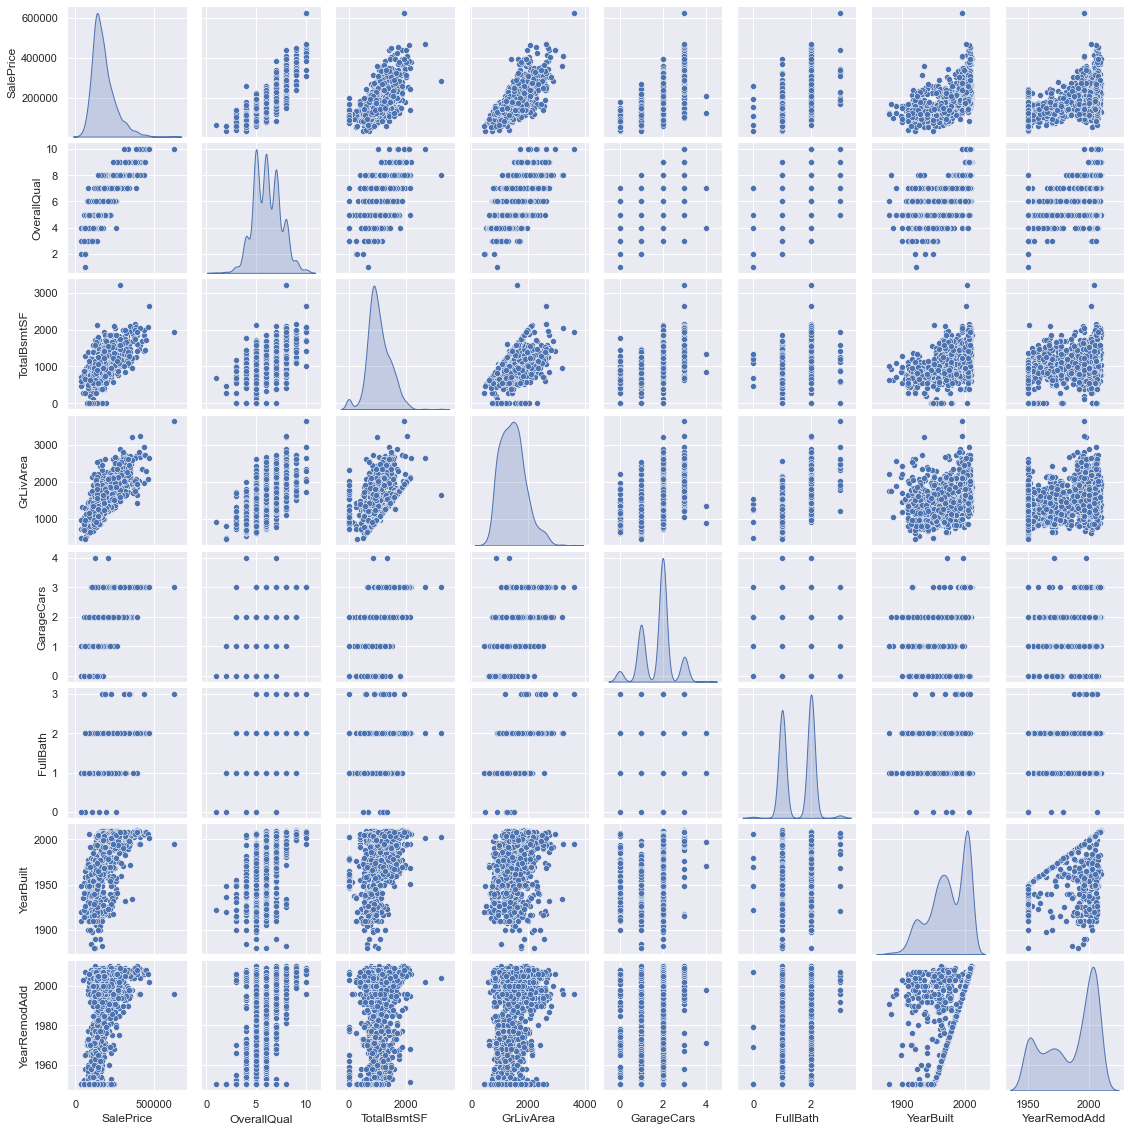

In [47]:
sns.set() 

columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageCars'
           ,'FullBath','YearBuilt','YearRemodAdd'] 

sns.pairplot(df_num_drop[columns],size = 2 ,kind ='scatter',diag_kind='kde') 

plt.show()



- 'TotalBsmtSF'와 'GrLiveArea'는 데이터 설명에서 알 수 있듯이 지하실의 면적과 생활공간 면적을 의미합니다. 'TotalBsmtSF'와 'GrLiveArea'의 plot을 보면 점들이 직선처럼 그려지고 대부분의 점은 해당 선 아래에 유지됩니다.

이것은 일반적으로 지하실 면적이 지상 생활 면적과 같을 수 있지만, 더 크진 않기 때문에 보여지는 특징이라고 할 수 있습니다.


- 'SalePrice'와 'YearBuilt'의 plot을 보면 우상향 곡선을 보입니다.

이것은 전년도 대비 주택 가격 상승의 가속을 의미하는 것 같다.



'TotalBsmtSF'와 'GrLiveArea' 사이의 숫자이다. 이 그림에서 우리는 점들이 거의 경계선처럼 작용하는 선을 그리는 것을 볼 수 있다. 대부분의 점들이 선 아래에 있다는 것은 완전히 말이 된다. 지하공간은 지상 생활권과 동일할 수 있지만, 지상 생활권보다 큰 지하공간은 기대할 수 없다.


'SalePrice'와 'YearBuilt'에 관한 결과도 몇 가지 인사이트를 준다. 'dots cloud'의 밑쪽 경계선에서 거의 지수함수로 보일만한 결과가 보인다. 'dots cloud'의 위쪽 경계선 또한 이런 경향을 볼 수 있다. 또한, 지난해에 관한 접 집합이 어떻게 이 한도를 상회하는 경향이 있는지 주목해보면 물가가 더 빠르게 오르고 있다고 판단.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

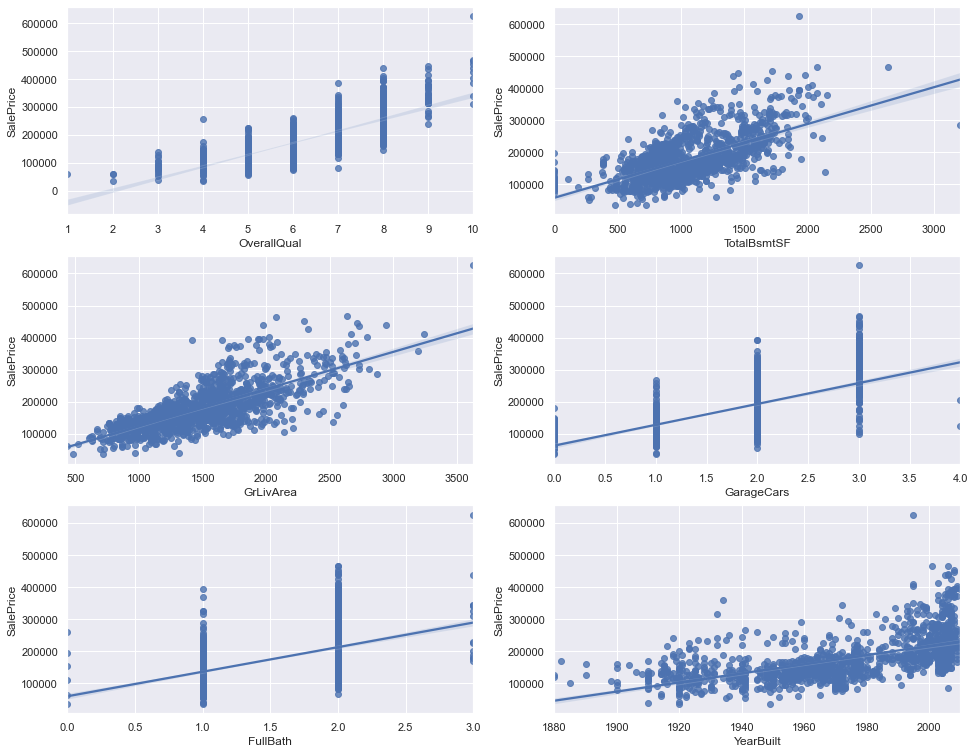

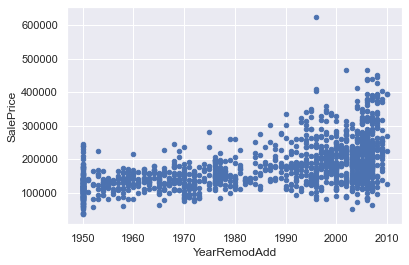

In [48]:
# 산점도

fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(16,13)) 

OverallQual_scatter_plot = pd.concat([df_num_drop['SalePrice'],df_num_drop['OverallQual']],axis = 1)

sns.regplot(x='OverallQual',y = 'SalePrice',data = OverallQual_scatter_plot,scatter= True, fit_reg=True, ax=ax1) 

TotalBsmtSF_scatter_plot = pd.concat([df_num_drop['SalePrice'],df_num_drop['TotalBsmtSF']],axis = 1) 

sns.regplot(x='TotalBsmtSF',y = 'SalePrice',data = TotalBsmtSF_scatter_plot,scatter= True, fit_reg=True, ax=ax2) 

GrLivArea_scatter_plot = pd.concat([df_num_drop['SalePrice'],df_num_drop['GrLivArea']],axis = 1) 

sns.regplot(x='GrLivArea',y = 'SalePrice',data = GrLivArea_scatter_plot,scatter= True, fit_reg=True, ax=ax3) 

GarageCars_scatter_plot = pd.concat([df_num_drop['SalePrice'],df_num_drop['GarageCars']],axis = 1) 

sns.regplot(x='GarageCars',y = 'SalePrice',data = GarageCars_scatter_plot,scatter= True, fit_reg=True, ax=ax4) 

FullBath_scatter_plot = pd.concat([df_num_drop['SalePrice'],df_num_drop['FullBath']],axis = 1) 

sns.regplot(x='FullBath',y = 'SalePrice',data = FullBath_scatter_plot,scatter= True, fit_reg=True, ax=ax5) 

YearBuilt_scatter_plot = pd.concat([df_num_drop['SalePrice'],df_num_drop['YearBuilt']],axis = 1) 

sns.regplot(x='YearBuilt',y = 'SalePrice',data = YearBuilt_scatter_plot,scatter= True, fit_reg=True, ax=ax6) 

YearRemodAdd_scatter_plot = pd.concat([df_num_drop['SalePrice'],df_num_drop['YearRemodAdd']],axis = 1) 

YearRemodAdd_scatter_plot.plot.scatter('YearRemodAdd','SalePrice')



### Categorical Feature

In [49]:
for catg in list(cateogorical_feats) : 
    print(df_num_drop[catg].value_counts()) 
    print('#'*50)


RL         1055
RM          197
FV           65
RH           14
C (all)       7
Name: MSZoning, dtype: int64
##################################################
Pave    1335
Grvl       3
Name: Street, dtype: int64
##################################################
Grvl    42
Pave    37
Name: Alley, dtype: int64
##################################################
Reg    859
IR1    440
IR2     32
IR3      7
Name: LotShape, dtype: int64
##################################################
Lvl    1211
Bnk      52
HLS      48
Low      27
Name: LandContour, dtype: int64
##################################################
AllPub    1338
Name: Utilities, dtype: int64
##################################################
Inside     972
Corner     235
CulDSac     81
FR2         46
FR3          4
Name: LotConfig, dtype: int64
##################################################
Gtl    1275
Mod      56
Sev       7
Name: LandSlope, dtype: int64
##################################################
NAmes      20

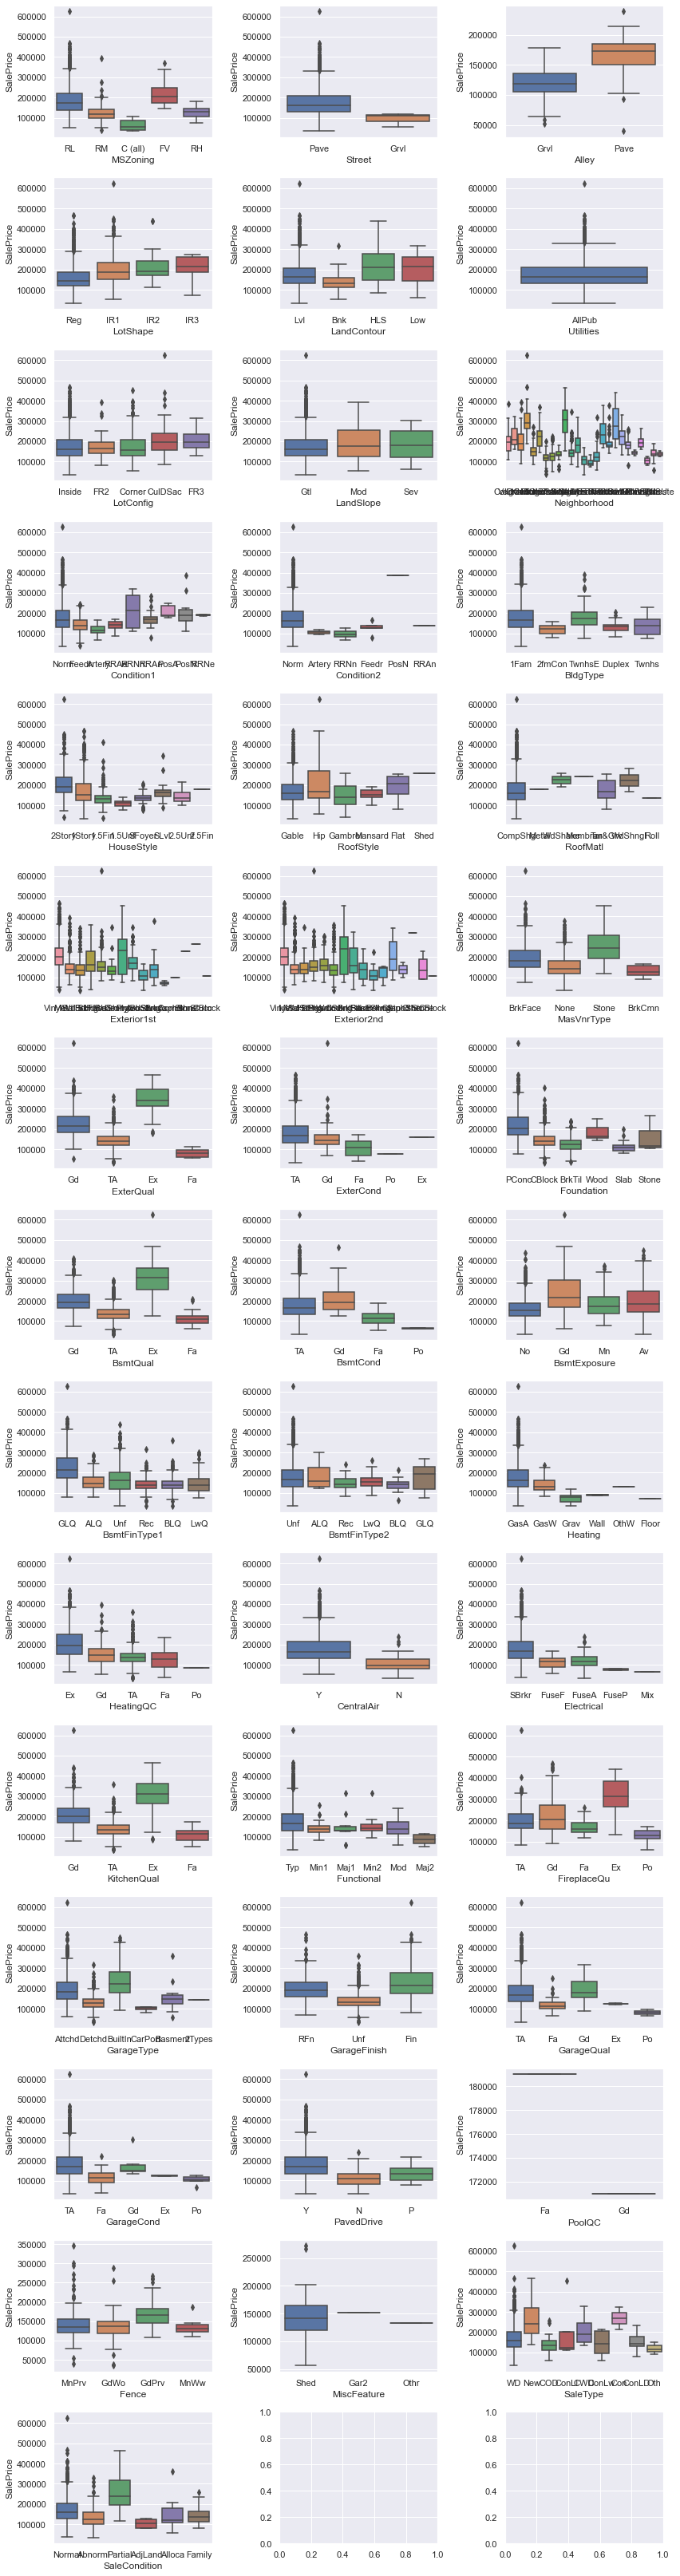

In [50]:
li_cat_feats = list(cateogorical_feats) 
nr_rows = 15 
nr_cols = 3 

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3)) 

for r in range(0,nr_rows): 
    for c in range(0,nr_cols): 
        i = r*nr_cols + c 
        
        if i < len(li_cat_feats): 
            sns.boxplot(x=li_cat_feats[i], y=df_num_drop["SalePrice"]
                        , data=df_num_drop, ax = axs[r][c]) 
            
plt.tight_layout() 
plt.show()



Categorical Feature와 SalePrice의 관계를 확인


Neighborhood 변수는 주택 가격 편차가 매우 크므로 영향이 크다고 생각됩니다.

SaleType 또한 마찬가지입니다.

또한 수영장이 있으면 가격이 크게 증가하는 것 같습니다.

 
Boxplot의 범주마다 보여지는 SalePrice 편차 정도에 따라 영향의 크기가 나눠진다고 보시면 될것같습니다.



> SalePrice에 영향을 많이 끼치는 변수로는 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual', 'CentralAir', 'Electrical', 'KitchenQual', 'SaleType' 등이 있습니다.


SalePrice와 관련이 큰 변수와 아닌 변수를 분리해놓습니다.

 
수치형 변수의 분리 기준은 EDA에서 보았던 상관관계를 통해 나누게 되고, 범주형 변수의 분리 기준은 BoxPlot에서 판단한 영향을 기준으로 나누게 됩니다.


"Id" 변수는 submission 과정 때문에 따로 빼놓도록 합시다.


In [51]:
num_strong_corr = ['SalePrice','OverallQual','TotalBsmtSF'
                   ,'GrLivArea','GarageCars', 'FullBath','YearBuilt','YearRemodAdd'] 

num_weak_corr = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond'
                 , 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'
                 , '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'BsmtFullBath'
                 , 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr'
                 , 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageArea'
                 , 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'
                 , 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'] 

catg_strong_corr = ['MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType'
                    , 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType'] 

catg_weak_corr = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig'
                  , 'LandSlope', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl'
                  , 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation'
                  , 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'
                  , 'Heating', 'HeatingQC', 'Functional', 'FireplaceQu'
                  , 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive'
                  , 'PoolQC', 'Fence', 'MiscFeature', 'SaleCondition' ]



## Feature Engineering

Skewness: 1.287364
Kurtosis: 2.555029


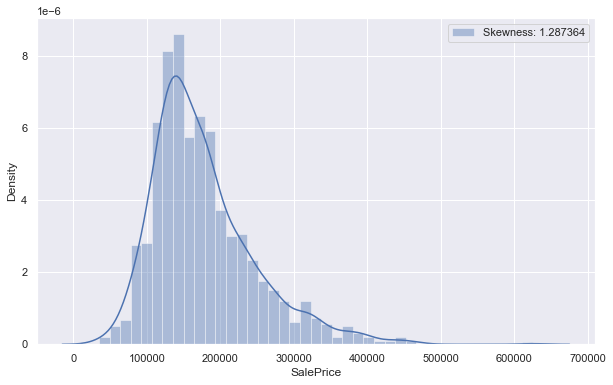

In [52]:
# 비대칭도와 첨도를 해결해주기 위해 데이터 분포에 Log

f, ax = plt.subplots(1, 1, figsize = (10,6)) 

g = sns.distplot(df_num_drop["SalePrice"], color = "b"
                 , label="Skewness: {:2f}".format(df_num_drop["SalePrice"].skew()), ax=ax) 

g = g.legend(loc = "best") 

print("Skewness: %f" % df_num_drop["SalePrice"].skew()) 
print("Kurtosis: %f" % df_num_drop["SalePrice"].kurt())



먼저 Target Feature인 'SalePrice'의 분포를 살펴봅시다. 

 

그래프와 수치를 확인하면 분포에 비대칭도와 첨도가 어느정도 파악되는 것을 확인할 수 있습니다.

예측의 정확도를 높히기 위해 로그 변환을 수행합니다.


- 정규분포와는 다르다
- 수용할만한 positive skewness가 있다.
- 정점이 있다

In [53]:
# descriptive statistics summary
# 종속변수(target) SalePrice 값 확인
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: -0.032026
Kurtosis: 0.571897


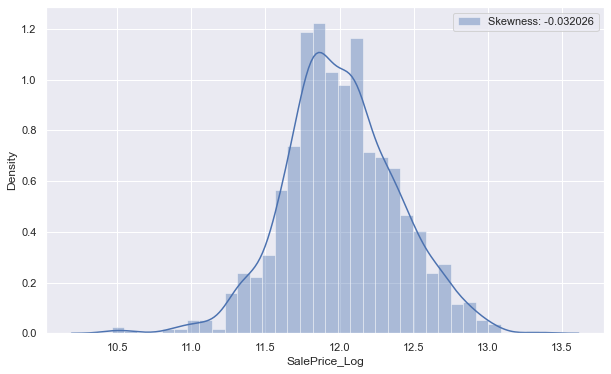

In [54]:
df_num_drop["SalePrice_Log"] = df_num_drop["SalePrice"].map(lambda i:np.log(i) if i>0 else 0) 

f, ax = plt.subplots(1, 1, figsize = (10,6)) 
g = sns.distplot(df_num_drop["SalePrice_Log"], color = "b"
                 , label="Skewness: {:2f}".format(df_num_drop["SalePrice_Log"].skew()), ax=ax) 

g = g.legend(loc = "best")
print("Skewness: %f" % df_num_drop['SalePrice_Log'].skew()) 
print("Kurtosis: %f" % df_num_drop['SalePrice_Log'].kurt()) 



#Log변환을 수행한 새로운 feature "SalePrice_Log"를 만들고 전 Feature인 "Saleprice"를 버려줍니다.
df_num_drop.drop('SalePrice', axis= 1, inplace=True)


Data Check 과정에서 살펴봤을 때 Skewness와 Kurtosis가 보이는 변수들이 꽤 있었습니다.

 

하지만 EDA 과정에서 중요하다고 판단되었던 Numerical feature들은 Skewness와 Kurtosis가 수치적으로 보이지

않으므로 Target Feature인 SalePrice만 Log를 취해줍니다.


## 결측치 처리

missing data에 대해 생각할 때 중요한 질문:

1. missing data가 얼마나 보편적인가?
2. missing data가 랜덤인가? 패턴이 있는가?

여러 변수들의 특징을 잘 살펴보면 NaN의 의미를 재파악할 수 있습니다.

단지 있다, 없다 개념일뿐 측정되지 않은 데이터의 의미가 아닙니다.

 

이러한 변수들의 특징을 잘 파악하여 결측 데이터를 처리해주도록 합니다.


In [55]:
#결측치 제거 전 train데이터의 missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


-  데이터의 15% 이상이 누락되었을 때 해당 변수를 삭제하고 그것이 존재하지 않았던 것처럼 진행해야 한다. 이런 경우 누락된 자료를 메우기 위해 어떤 꼼수도 시도하지 않겠다는 뜻이다. 
>  'PoolQC', 'MiscFeature', 'Alley', 등

- 'GarageX' 변수들은 동일한 수치의 missing data를 가지고 있다는 것을 알 수 있다. missing data 가 같은 관측치 일 것이라 판단.
> 차고와 관련된 가장 중요한 정보는 'GarageCars'이기 때문에 언급된 'GarageX' 변수들을 삭제하겠다. 동일한 논리로.'BsmtX' 변수에 적용

- 'MasVnrArea'와 'MasVnrType'에 관해서, 이러한 변수는 반드시 필요한 것은 아니라고 생각할 수 있다. 이미 고려되고 있는 'YearBuilt'와 'OverallQual'와 강한 상관관계를 가지고 있다. 따라서 'MasVnrArea'와 'MasVnrType'를 삭제해도 정보를 잃지 않을 것이다.


- 'Electrical'에서 단 한 개의 missing data가 있다. 해당 데이터만 삭제하고 변수를 유지하겠다.

- dealing with missing data

df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)

df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

In [56]:
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu'
               , 'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical', 'KitchenQual'
               , 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st', 'BsmtExposure','BsmtCond'
               ,'BsmtQual','BsmtFinType1','BsmtFinType2', 'MSZoning', 'Utilities'] 

# NaN을 없다는 의미의 None 데이터로 바꿔줍시다.
for col in cols_fillna: 
    df_num_drop[col].fillna('None',inplace=True) 
#    df_test[col].fillna('None',inplace=True) > 테스트 데이터도 처리

df_train = df_num_drop

In [57]:
total = df_train.isnull().sum().sort_values(ascending=False) 

percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False) 

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 

missing_data.head(5)



,Total,Percent
LotFrontage,229,0.171151
GarageYrBlt,65,0.048580
MasVnrArea,7,0.005232
SalePrice_Log,0,0.000000
ExterCond,0,0.000000


In [58]:
# 남은 결측치들은 수치형 변수들이므로, 평균값으로 대체

df_train.fillna(df_train.mean(), inplace=True) 

total = df_train.isnull().sum().sort_values(ascending=False) 
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False) 
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 

missing_data.head(5)

,Total,Percent
SalePrice_Log,0,0.0
Heating,0,0.0
RoofStyle,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0


In [59]:
df_train.isnull().sum().sum()

0

다음으로 유의하지 않다고 판단되는 변수를 삭제시켜 줍니다.


In [60]:
# 'SalePrice'와의 상관관계가 약한 모든 변수를 삭제

id_test = df_train['Id'] 

to_drop_num = num_weak_corr 
to_drop_catg = catg_weak_corr 

cols_to_drop = ['Id'] + to_drop_num + to_drop_catg 

for df in [df_train]: 
    df.drop(cols_to_drop, inplace= True, axis = 1)

    
df_train.head()

,MSZoning,Neighborhood,Condition2,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,ExterQual,BsmtQual,TotalBsmtSF,CentralAir,Electrical,GrLivArea,FullBath,KitchenQual,GarageCars,SaleType,SalePrice_Log
0,RL,CollgCr,Norm,7,2003,2003,BrkFace,Gd,Gd,856,Y,SBrkr,1710,2,Gd,2,WD,12.247694
1,RL,Veenker,Norm,6,1976,1976,None,TA,Gd,1262,Y,SBrkr,1262,2,TA,2,WD,12.109011
2,RL,CollgCr,Norm,7,2001,2002,BrkFace,Gd,Gd,920,Y,SBrkr,1786,2,Gd,2,WD,12.317167
3,RL,Crawfor,Norm,7,1915,1970,None,TA,TA,756,Y,SBrkr,1717,1,Gd,3,WD,11.849398
4,RL,NoRidge,Norm,8,2000,2000,BrkFace,Gd,Gd,1145,Y,SBrkr,2198,2,Gd,3,WD,12.429216


- Categorical Data들을 수치형으로 변환

EDA과정의 Boxplot에서 보았던 SalePrice에 영향이 큰 변수들을 변환해줍니다.

먼저 ViolinPlot을 그려 각 범주들과 SalePrice의 관계를 살펴봅니다.


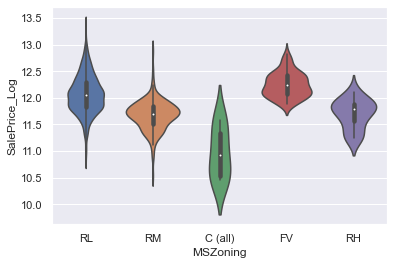

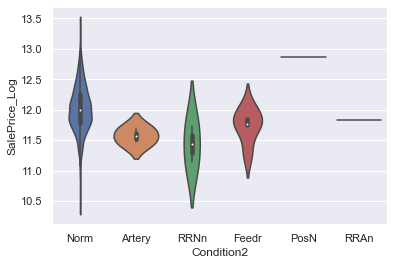

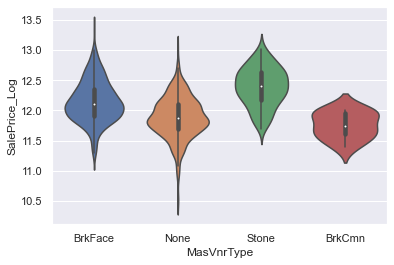

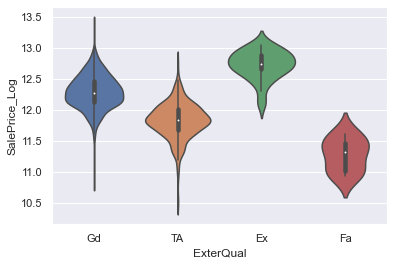

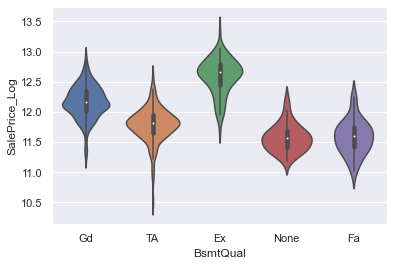

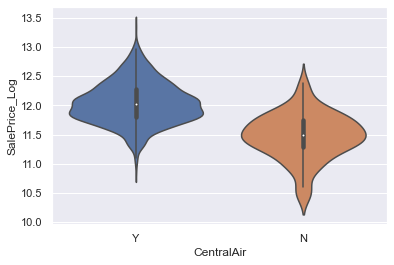

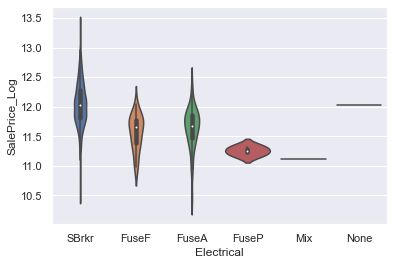

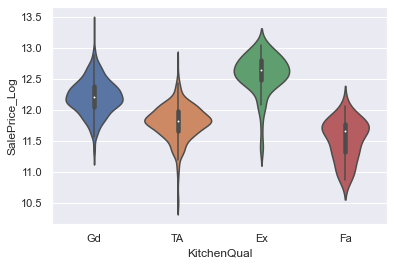

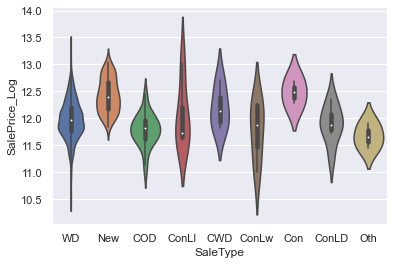

In [61]:
catg_list = catg_strong_corr.copy() 

catg_list.remove('Neighborhood') 

for catg in catg_list : 
    sns.violinplot(x=catg, y=df_train["SalePrice_Log"], data=df_train) 
    plt.show()



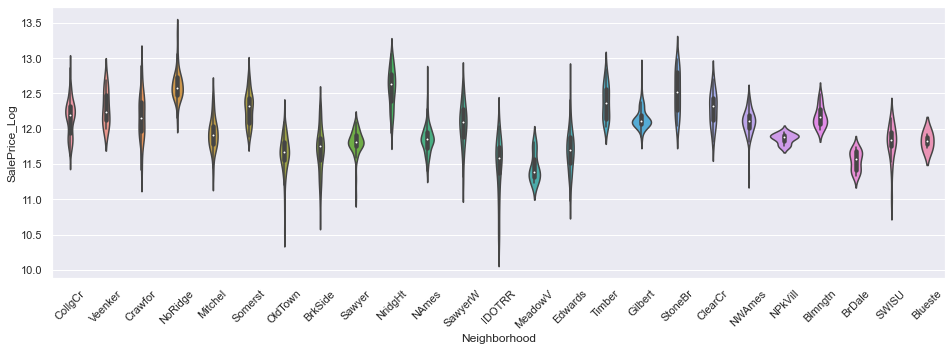

In [62]:
# 'Neighborhood' 변수는 범주가 많기 때문에 따로

fig, ax = plt.subplots() 
fig.set_size_inches(16, 5) 
sns.violinplot(x='Neighborhood', y=df_train["SalePrice_Log"], data=df_train, ax=ax) 
plt.xticks(rotation=45) 
plt.show()

In [63]:
#각 범주들에 해당되는 SalePrice_Log 평균

for catg in catg_list : 
    g = df_train.groupby(catg)["SalePrice_Log"].mean() 
    print(g)


MSZoning
C (all)    10.960733
FV         12.246616
RH         11.700602
RL         12.069474
RM         11.677434
Name: SalePrice_Log, dtype: float64
Condition2
Artery    11.570036
Feedr     11.734675
Norm      12.012766
PosN      12.860999
RRAn      11.827043
RRNn      11.435329
Name: SalePrice_Log, dtype: float64
MasVnrType
BrkCmn     11.757397
BrkFace    12.150038
None       11.884715
Stone      12.391766
Name: SalePrice_Log, dtype: float64
ExterQual
Ex    12.727937
Fa    11.274881
Gd    12.295102
TA    11.828332
Name: SalePrice_Log, dtype: float64
BsmtQual
Ex      12.595497
Fa      11.585725
Gd      12.170320
None    11.572903
TA      11.791989
Name: SalePrice_Log, dtype: float64
CentralAir
N    11.471479
Y    12.042717
Name: SalePrice_Log, dtype: float64
Electrical
FuseA    11.641350
FuseF    11.565700
FuseP    11.256345
Mix      11.112448
None     12.028739
SBrkr    12.047595
Name: SalePrice_Log, dtype: float64
KitchenQual
Ex    12.582467
Fa    11.514567
Gd    12.209558
TA    11.

In [64]:
# 수치형 변환을 위해 Violinplot과 SalePrice_Log 평균을 참고하여 각 변수들의 범주들을 그룹화

# 'MSZoning' 
msz_catg2 = ['RM', 'RH'] 
msz_catg3 = ['RL', 'FV'] 

# Neighborhood 
nbhd_catg2 = ['Blmngtn', 'ClearCr', 'CollgCr', 'Crawfor', 'Gilbert', 'NWAmes'
              , 'Somerst', 'Timber', 'Veenker'] 
nbhd_catg3 = ['NoRidge', 'NridgHt', 'StoneBr'] 

# Condition2 
cond2_catg2 = ['Norm', 'RRAe'] 
cond2_catg3 = ['PosA', 'PosN'] 

# SaleType 
SlTy_catg1 = ['Oth'] 
SlTy_catg3 = ['CWD'] 
SlTy_catg4 = ['New', 'Con']



In [65]:
# 범주별로 수치형 변환
for df in [df_train]: 
    df['MSZ_num'] = 1 
    df.loc[(df['MSZoning'].isin(msz_catg2) ), 'MSZ_num'] = 2 
    df.loc[(df['MSZoning'].isin(msz_catg3) ), 'MSZ_num'] = 3 
    
    df['NbHd_num'] = 1    
    df.loc[(df['Neighborhood'].isin(nbhd_catg2) ), 'NbHd_num'] = 2 
    df.loc[(df['Neighborhood'].isin(nbhd_catg3) ), 'NbHd_num'] = 3 
    
    df['Cond2_num'] = 1 
    df.loc[(df['Condition2'].isin(cond2_catg2) ), 'Cond2_num'] = 2 
    df.loc[(df['Condition2'].isin(cond2_catg3) ), 'Cond2_num'] = 3 
    
    df['Mas_num'] = 1 
    df.loc[(df['MasVnrType'] == 'Stone' ), 'Mas_num'] = 2 
    
    df['ExtQ_num'] = 1 
    df.loc[(df['ExterQual'] == 'TA' ), 'ExtQ_num'] = 2 
    df.loc[(df['ExterQual'] == 'Gd' ), 'ExtQ_num'] = 3 
    df.loc[(df['ExterQual'] == 'Ex' ), 'ExtQ_num'] = 4 
    
    df['BsQ_num'] = 1 
    df.loc[(df['BsmtQual'] == 'Gd' ), 'BsQ_num'] = 2 
    df.loc[(df['BsmtQual'] == 'Ex' ), 'BsQ_num'] = 3 
    
    df['CA_num'] = 0 
    df.loc[(df['CentralAir'] == 'Y' ), 'CA_num'] = 1 
    
    df['Elc_num'] = 1 
    df.loc[(df['Electrical'] == 'SBrkr' ), 'Elc_num'] = 2 
    
    df['KiQ_num'] = 1 
    df.loc[(df['KitchenQual'] == 'TA' ), 'KiQ_num'] = 2 
    df.loc[(df['KitchenQual'] == 'Gd' ), 'KiQ_num'] = 3 
    df.loc[(df['KitchenQual'] == 'Ex' ), 'KiQ_num'] = 4 
    
    df['SlTy_num'] = 2 
    df.loc[(df['SaleType'].isin(SlTy_catg1) ), 'SlTy_num'] = 1 
    df.loc[(df['SaleType'].isin(SlTy_catg3) ), 'SlTy_num'] = 3 
    df.loc[(df['SaleType'].isin(SlTy_catg4) ), 'SlTy_num'] = 4



<AxesSubplot:title={'center':'Correlation of New Features'}>

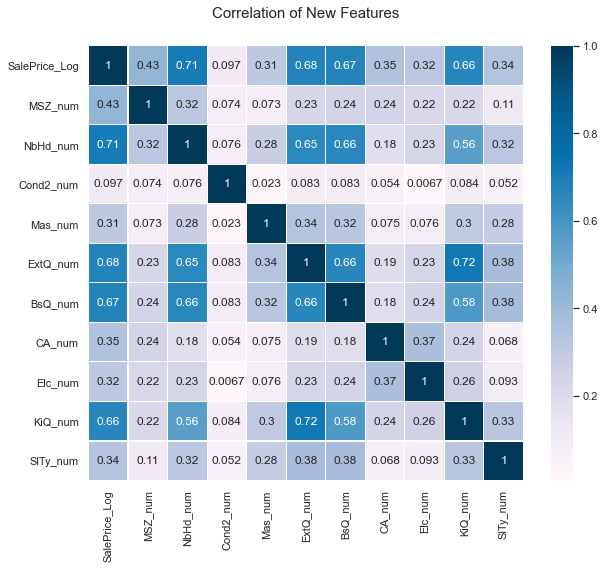

In [66]:
# 변환하여 새로 만들어진 Numerical Feature들 또한 Heat Map을 그려


new_col_HM = df_train[['SalePrice_Log', 'MSZ_num', 'NbHd_num', 'Cond2_num', 'Mas_num', 'ExtQ_num'
                       , 'BsQ_num', 'CA_num', 'Elc_num', 'KiQ_num', 'SlTy_num']] 

colormap = plt.cm.PuBu 

plt.figure(figsize=(10, 8)) 
plt.title("Correlation of New Features", y = 1.05, size = 15) 

sns.heatmap(new_col_HM.corr(), linewidths = 0.1, vmax = 1.0, square = True
            , cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 12})



NbHd_num, ExtQ_num, BsQ_num, KiQ_num를 제외하고는 SalePrice_Log와 큰 상관관계가있는 열은 거의 없습니다.


In [67]:
#기존 범주형 변수와 새로 만들어진 수치형 변수 역시 유의하지 않은 것들은 삭제


df_train.drop(['MSZoning','Neighborhood' , 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual'
               ,'CentralAir', 'Electrical', 'KitchenQual', 'SaleType', 'Cond2_num', 'Mas_num'
               , 'CA_num', 'Elc_num', 'SlTy_num'], axis = 1, inplace = True) 

                                                              
df_train.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,GarageCars,SalePrice_Log,MSZ_num,NbHd_num,ExtQ_num,BsQ_num,KiQ_num
0,7,2003,2003,856,1710,2,2,12.247694,3,2,3,2,3
1,6,1976,1976,1262,1262,2,2,12.109011,3,2,2,2,2
2,7,2001,2002,920,1786,2,2,12.317167,3,2,3,2,3
3,7,1915,1970,756,1717,1,3,11.849398,3,2,2,1,3
4,8,2000,2000,1145,2198,2,3,12.429216,3,3,3,2,3


In [69]:
df_train.to_csv("E:/comento/change0221_train_mdf.csv", index = False)

In [ ]:
# df_test.drop(['MSZoning', 'Neighborhood' , 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType', 'Cond2_num', 'Mas_num', 'CA_num', 'Elc_num', 'SlTy_num'], axis = 1, inplace = True)
